In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import TomekLinks

In [48]:
Parkinsons_Dataset= pd.read_csv("parkinsons.csv")

In [49]:
Parkinsons_Dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [50]:
Parkinsons_Dataset.shape

(195, 24)

In [51]:
Parkinsons_Dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [52]:
print(Parkinsons_Dataset.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [53]:
# Drop non-relevant columns if needed (e.g., patient name if present)
if 'name' in Parkinsons_Dataset.columns:
    Parkinsons_Dataset.drop(columns=['name'], inplace=True)

In [54]:
# Data Preprocessing
# Converting categorical variables to dummy variables
df = pd.get_dummies(Parkinsons_Dataset, drop_first=True)

In [55]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [56]:
# Separating features and target
X = df.drop(columns=['status'])  # Features
y = df['status']  # Target

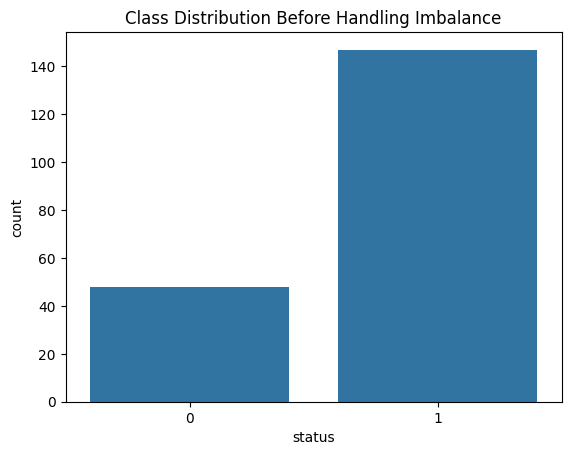

status
1    75.384615
0    24.615385
Name: proportion, dtype: float64


In [14]:
# Checking Class Distribution before handling imbalance
sns.countplot(x=y)
plt.title("Class Distribution Before Handling Imbalance")
plt.show()
print(y.value_counts(normalize=True) * 100)


In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


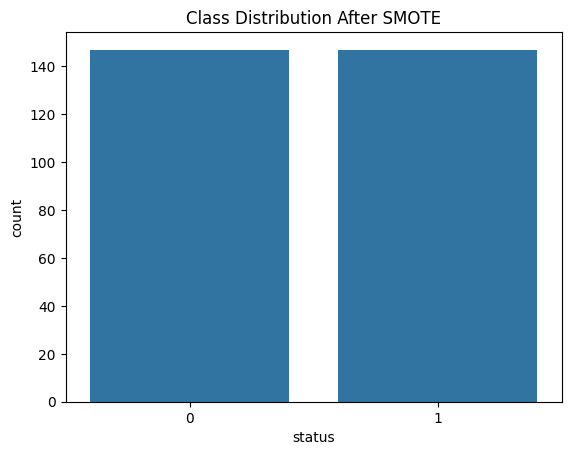

status
1    147
0    147
Name: count, dtype: int64


In [58]:
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()
print(y_resampled.value_counts())


In [60]:
#No need of using tomeks links as now data is balanced
# Splitting into Train and Test Set (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [61]:
# Initializing Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


Logistic Regression:
Accuracy: 0.7966101694915254
Cross Validation Score: 0.8170212765957446
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.84      0.72      0.78        29

    accuracy                           0.80        59
   macro avg       0.80      0.80      0.80        59
weighted avg       0.80      0.80      0.80        59



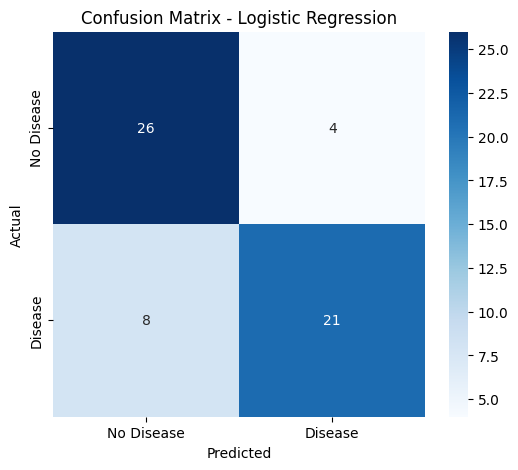


Random Forest:
Accuracy: 0.9830508474576272
Cross Validation Score: 0.9063829787234043
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        29

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



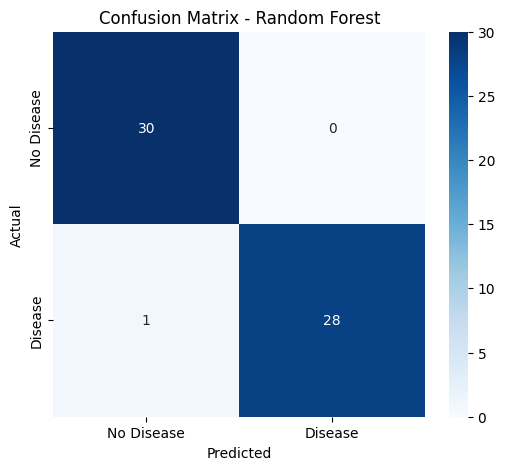


SVM:
Accuracy: 0.8135593220338984
Cross Validation Score: 0.8170212765957446
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        30
           1       0.88      0.72      0.79        29

    accuracy                           0.81        59
   macro avg       0.82      0.81      0.81        59
weighted avg       0.82      0.81      0.81        59



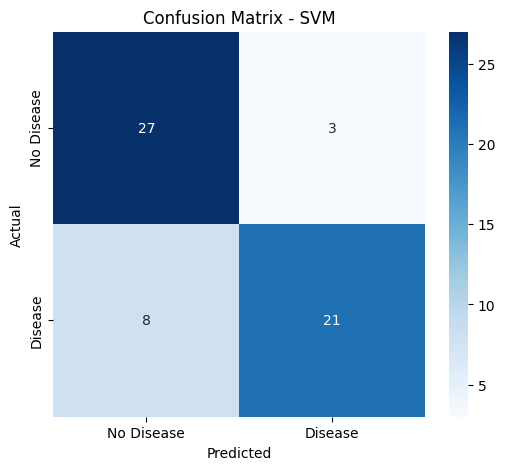


K-Nearest Neighbors:
Accuracy: 0.8983050847457628
Cross Validation Score: 0.8425531914893618
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.93      0.86      0.89        29

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



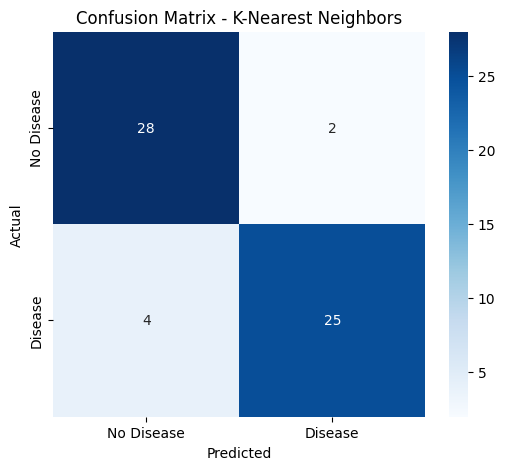


Decision Tree:
Accuracy: 0.8983050847457628
Cross Validation Score: 0.9106382978723404
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91        30
           1       0.96      0.83      0.89        29

    accuracy                           0.90        59
   macro avg       0.91      0.90      0.90        59
weighted avg       0.91      0.90      0.90        59



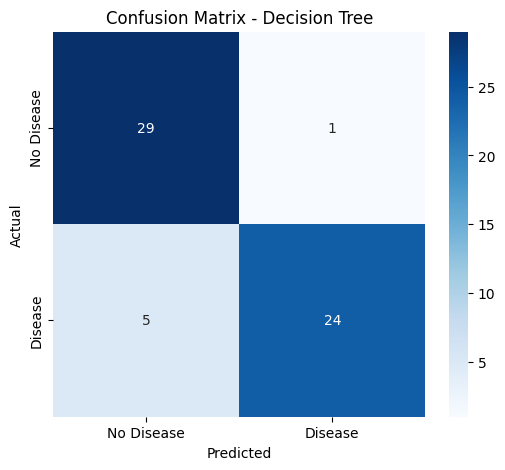


Best Model Based on Accuracy:  RandomForestClassifier(random_state=42)


In [65]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Model Training & Evaluation
results = {}
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    results[name] = {"Accuracy": acc, "Cross Validation Score": cv_score}
    
    print(f"\n{name}:")
    print("Accuracy:", acc)
    print("Cross Validation Score:", cv_score)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Save the best model based on accuracy
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model  # Store the actual trained model

# Print the best model
print("\nBest Model Based on Accuracy: ", best_model)

In [66]:
# Save the best model using pickle
import pickle
filename='parkinsons_model.sav'
pickle.dump(best_model,open(filename,'wb'))

In [22]:
""" # Checking class distribution
sns.countplot(x=df['status'])
plt.title("Class Distribution of Target Variable")
plt.show()

# Printing exact class counts
print(df['status'].value_counts(normalize=True) * 100) """

' # Checking class distribution\nsns.countplot(x=df[\'status\'])\nplt.title("Class Distribution of Target Variable")\nplt.show()\n\n# Printing exact class counts\nprint(df[\'status\'].value_counts(normalize=True) * 100) '

In [23]:
""" X.head() """

' X.head() '

In [24]:
""" # Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) """

' # Train-Test Split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) '

In [25]:
""" X_train.head() """

' X_train.head() '

In [26]:
""" X_test.shape """

' X_test.shape '

In [27]:
""" # Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) """

' # Feature Scaling\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test) '

In [28]:
""" # Models to Evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": 
	RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
} """

' # Models to Evaluate\nmodels = {\n    "Logistic Regression": LogisticRegression(),\n    "Random Forest": \n\tRandomForestClassifier(n_estimators=100, random_state=42),\n    "Support Vector Machine": SVC(kernel=\'linear\'),\n    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)\n} '

In [29]:
""" # Model Training & Evaluation
results = {}
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    results[name] = {"Accuracy": acc, "Cross Validation Score": cv_score}
    
    print(f"\n{name}:")
    print("Accuracy:", acc)
    print("Cross Validation Score:", cv_score)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
	# Plotting Confusion Matrix as a heatmap
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show() """

' # Model Training & Evaluation\nresults = {}\nbest_model = None\nbest_accuracy = 0\n\nfor name, model in models.items():\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    acc = accuracy_score(y_test, y_pred)\n    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()\n    results[name] = {"Accuracy": acc, "Cross Validation Score": cv_score}\n    \n    print(f"\n{name}:")\n    print("Accuracy:", acc)\n    print("Cross Validation Score:", cv_score)\n    print("Classification Report:\n", classification_report(y_test, y_pred))\n    \n\t# Plotting Confusion Matrix as a heatmap\n    conf_matrix = confusion_matrix(y_test, y_pred)\n    plt.figure(figsize=(6, 5))\n    sns.heatmap(conf_matrix, annot=True, fmt=\'d\', cmap=\'Blues\', xticklabels=[\'No Disease\', \'Disease\'], yticklabels=[\'No Disease\', \'Disease\'])\n    plt.title(f\'Confusion Matrix - {name}\')\n    plt.ylabel(\'Actual\')\n    plt.xlabel(\'Predicted\')\n    plt.show() '